In [1]:
# Always run this first
# NOTE: Do not define new basic variables in this notebook;
#       define them in Variables_Q.ipynb.  Use this notebook
#       to define new expressions built from those variables.

from __future__ import division # This needs to be here, even though it's in Variables_Q.ipynb
import sys
sys.path.insert(0, '..') # Look for modules in directory above this one
execfile('../Utilities/ExecNotebook.ipy')
try: execnotebook(VariablesNotebook)
except: execnotebook('Variables_Q.ipynb')

/home/dzsun/miniconda3/lib/python3.9/site-packages/IPython/nbformat.py:12: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  warn("The `IPython.nbformat` package has been deprecated since IPython 4.0. "


The following `PNCollection` objects will contain all the terms describing precession.

In [2]:
Precession_ellHat  = PNCollection()
Precession_chiVec1 = PNCollection()
Precession_chiVec2 = PNCollection()

# Precession of orbital angular velocity $\vec{\Omega}_{\hat{\ell}}$

[Bohé et al. (2013)](http://arxiv.org/abs/1212.5520v2) say that the precession of the orbital angular velocity is along $\hat{n}$, with magnitude (in their notation) $a_{\ell}/r\omega = \gamma\, a_{\ell} / v^3$.

*NOTE:* There is a 3pN gauge term in $\gamma_{\text{PN}}$ that I have simply dropped here.  It is $\ln(r/r_0')$.

The following two cells are Eqs. (4.3) and (4.4) of [Bohé et al. (2013)](http://arxiv.org/abs/1212.5520v2), respectively.

In [3]:
Precession_ellHat.AddDerivedVariable('gamma_PN_coeff', v**2)

Precession_ellHat.AddDerivedConstant('gamma_PN_0', 1)
# gamma_PN_1 is 0
Precession_ellHat.AddDerivedConstant('gamma_PN_2', -nu/3 + 1)
Precession_ellHat.AddDerivedVariable('gamma_PN_3', (5*S_ell/3 + Sigma_ell*delta)/M**2)
Precession_ellHat.AddDerivedConstant('gamma_PN_4', -65*nu/12 + 1)
Precession_ellHat.AddDerivedVariable('gamma_PN_5',
    ((frac(8,9)*nu + frac(10,3))*S_ell + 2*Sigma_ell*delta)/M**2)
Precession_ellHat.AddDerivedConstant('gamma_PN_6',
    nu**3/81 + 229*nu**2/36 - 41*pi**2*nu/192 - 2203*nu/2520 + 1)
Precession_ellHat.AddDerivedVariable('gamma_PN_7',
    ((-6*nu**2 - 127*nu/12 + 5)*S_ell - 8*Sigma_ell*delta*nu**2/3 + (-61*nu/6 + 3)*Sigma_ell*delta)/M**2)

In [4]:
Precession_ellHat.AddDerivedVariable('a_ell_coeff', v**7/M**3)

Precession_ellHat.AddDerivedVariable('a_ell_0', 7*S_n + 3*Sigma_n*delta)
# gamma_PN_1 is 0
Precession_ellHat.AddDerivedVariable('a_ell_2', (-29*nu/3-10)*S_n + (-9*nu/2-6)*delta*Sigma_n)
# gamma_PN_3 is 0
Precession_ellHat.AddDerivedVariable('a_ell_4',
    (frac(52,9)*nu**2 + frac(59,4)*nu + frac(3,2))*S_n
     + (frac(17,6)*nu**2 + frac(73,8)*nu + frac(3,2))*delta*Sigma_n)

In [5]:
def Precession_ellHatExpression(PNOrder=frac(7,2)):
    OmegaVec_ellHat = (gamma_PN_coeff.substitution*a_ell_coeff.substitution/v**3)\
        *horner(sum([key*(v**n) for n in range(2*PNOrder+1)
                     for key,val in Precession_ellHat.items() if val==('gamma_PN_{0}'.format(n))]))\
        *horner(sum([key*(v**n) for n in range(2*PNOrder+1)
                     for key,val in Precession_ellHat.items() if val==('a_ell_{0}'.format(n))]))
    return OmegaVec_ellHat

In [6]:
# Precession_ellHatExpression()

# Precession of spins $\vec{\Omega}_{1,2}$

Equation (4.5) of [Bohé et al. (2013)](http://arxiv.org/abs/1212.5520v2) gives spin-orbit terms:

In [7]:
Precession_chiVec1.AddDerivedVariable('Omega1_coeff', v**5/M)

Precession_chiVec1.AddDerivedVariable('OmegaVec1_SO_0',
    (frac(3,4) + frac(1,2)*nu - frac(3,4)*delta)*ellHat, datatype=ellHat.datatype)
Precession_chiVec1.AddDerivedVariable('OmegaVec1_SO_2',
    (frac(9,16) + frac(5,4)*nu - frac(1,24)*nu**2 + delta*(-frac(9,16)+frac(5,8)*nu))*ellHat, datatype=ellHat.datatype)
Precession_chiVec1.AddDerivedVariable('OmegaVec1_SO_4',
    (frac(27,32) + frac(3,16)*nu - frac(105,32)*nu**2 - frac(1,48)*nu**3
     + delta*(-frac(27,32) + frac(39,8)*nu - frac(5,32)*nu**2))*ellHat, datatype=ellHat.datatype)

In his Eqs. (2.4), [Kidder (1995)](http://link.aps.org/doi/10.1103/PhysRevD.52.821) summarized certain spin-spin terms:

In [8]:
Precession_chiVec1.AddDerivedVariable('OmegaVec1_SS_1', M2**2*(-chiVec2+3*chi2_n*nHat)/M**2, datatype=nHat.datatype)
Precession_chiVec1.AddDerivedVariable('OmegaVec1_SS_3', 
                                      nHat*((13*S1_n)/4. - (delta*S1_n)/4.-(3*S1_n)/(2.*nu) + (3*delta*S1_n)/(2.*nu) + (nu*S1_n)/2. + ((3*delta + 4*(-3 + nu))*S2_n)/2. -  3*(-3 + nu)*S2_n +  (3*(-3 + nu)*(-1 + delta + 2*nu)*S1_n*kappa_1)/(2.*nu) -  (3*(5 + 5*delta*(-1 + nu) - 15*nu + 2*nu**2)*S1_n*kappa_1)/(4.*nu))
                                      + S2*(-3 + (2 - delta - 2*nu)/2. + nu)
                                      + lambdaHat*(((4 + delta)*S2_lambda)/2.), datatype=nHat.datatype)
Precession_chiVec1.AddDerivedVariable('OmegaVec1_SS_4', 
                                      nHat*( (15*S_ell*S2_n)/M**2 -   (15*(-1 + delta + 2*nu)*S_ell*S1_n*kappa_1)/  (2.*M**2*nu) + (9*delta*S2_n*Sigma_ell)/M**3 -  (9*delta*(-1 + delta + 2*nu)*S1_n*kappa_1*Sigma_ell)/ (2.*M**3*nu))
                                      + S2*((-5*S_ell)/M**2 - (3*delta*Sigma_ell)/M**3)
                                      + lambdaHat*((-3*S1_lambda*(1 + delta*(-1 + nu) - 3*nu + 2*(-1 + delta + 2*nu)*kappa_1))/(4.*nu)), datatype=nHat.datatype)
#print("WARNING: OmegaVec1_SS_1 in Precession.ipynb is disabled temporarily")

***NOTE: Is Etienne's notation consistent with others? ***  It seems like when he introduces other people's terms, he mixes $\hat{n}$ and $\hat{\ell}$.

Finally, in his Eq. (2.7) [Racine (2008)](http://link.aps.org/doi/10.1103/PhysRevD.78.044021) added a quadrupole-monopole term along $\hat{n}$:

In [9]:
Precession_chiVec1.AddDerivedVariable('OmegaVec1_QM_1', 3*nu*chi1_n*nHat, datatype=nHat.datatype)
#print("WARNING: OmegaVec1_QM_1 in Precession.ipynb is disabled temporarily")

For the precession vector of the other spin, rather than re-entering the same things with 1 and 2 swapped, we just let python do it:

In [10]:
for key,val in Precession_chiVec1.items():
    try:
        tmp = key.substitution.subs({delta: -delta, M1:'swap1', M2:M1, chi1_n:'swap2', chi2_n:chi1_n,
                                     chiVec1:'swap3', chiVec2:chiVec1, S1_n:'swap4', S2_n:S1_n, 
                                     kappa_1:'swap5', kappa_2:kappa_1, S1_lambda:'swap6', 
                                     S2_lambda:S1_lambda, S1:'swap7', S2:S1}).subs({'swap1':M2,'swap2':chi2_n,'swap3':chiVec2,
                                                                                    'swap4':S2_n,'swap5':kappa_2,
                                                                                    'swap6':S2_lambda,'swap7':S2})
        Precession_chiVec2.AddDerivedVariable(val.replace('OmegaVec1', 'OmegaVec2').replace('Omega1', 'Omega2'),
                                              tmp, datatype=key.datatype)
    except AttributeError:
        Precession_chiVec2.AddDerivedVariable(val.replace('OmegaVec1', 'OmegaVec2').replace('Omega1', 'Omega2'),
                                              key, datatype=key.datatype)

Finally, we define functions to put them together:

In [11]:
def Precession_chiVec1Expression(PNOrder=frac(7,2)):
    return Omega1_coeff*collect(expand(sum([key.substitution*(v**n)
                                            for n in range(2*PNOrder+1)
                                            for key,val in Precession_chiVec1.items()
                                            if val.endswith('_{0}'.format(n))])),
                                [ellHat,nHat,lambdaHat,chiVec1,chiVec2,S1,S2], horner)
def Precession_chiVec2Expression(PNOrder=frac(7,2)):
    return Omega2_coeff*collect(expand(sum([key.substitution*(v**n)
                                            for n in range(2*PNOrder+1)
                                            for key,val in Precession_chiVec2.items()
                                            if val.endswith('_{0}'.format(n))])),
                                [ellHat,nHat,lambdaHat,chiVec1,chiVec2,S1,S2], horner)

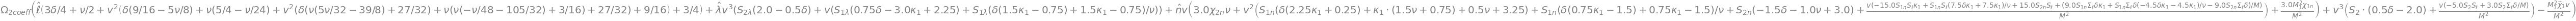

In [12]:
Precession_chiVec2Expression()